# Project: Investigate Medical Appointments No Shows
###### Investigating Medical Appointment No Shows dataset 


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#Executive">Executive Summary</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>




<a id='intro'></a>
## Introduction

### Project Description 
This project is part of the **Advanced Data Analysis Nanodegree Program** by Udacity a scholarship by **(Egypt FWD)** Future work is a digital initiative powered by Information Technology Industry Development Agency **(ITIDA)** to upskill Web, Data and Digital marketing tech skills for jobs of the future, to equip and train 100,000 young Egyptians for digital technologies and skills to remote work and local market opportunities.

### Dataset Description 
The Investigate a Dataset project!, The dataset collects information from more than 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.
 The Project Medical Appointments No Shows is investigating Medical Appointment No Shows dataset which contains historical data for more than 110K appointments made accross different medical facilities in Brazil for more than 60k patients, for each record there are 14 Variables, metadata related to appointments date, patients gender, age,medical condtion, social support coverage and facilities and 1 TARGET variable "Wither the patient attended the appointment or not, read through the description available on the homepage-links present [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True)

### Project Target

What is the explanation for a person making a doctor appointment, receives all the instructions and no-show. Who to blame?


###### Project By
Hossam Megahed


<a id='Executive'></a>

## Executive Summary

<p> 
With thorough inspection, data wrangling and cleaning, testing hypotheses and feature engineering, it was concluded there are 5 main contributing factors on whether the patient attend to his appointment in the scheduled or not? 
Contributing factors are:
<ul>
  <li>The duration between the appointment scheduling date and Appointment date <em>"The more the duration increased the less probable the patient to attend"</em>. </li>
  <li>The frequency of appointments  <em>"Whether the patient is making his first appointment or not?"</em></li>
  <li>Age or the patients</li>
   <li>Whether the patient recieved a reminder sms about his appointment date or not?</li>
   <li>Does the patient suffer from hipertension?</li>
</ul>
At any given working day, it's expected that all 81 facilities included in the dataset will receive on average 4250 appointments, 95% confidence interval (4125 to 4355) appointments, and the No-show average at 95% confindence interval, will be(19.5% to 20.9%) per day 
</p> 

> **Considering the most contributing attributes, it was concluded that thier is a total of 80 scenarios covering all the possible combinations of all relevant features, out of the 80 scenarios, there are 24 scenarios which covers total of 80% of all the No-shows cases, contributing to almost 60% of all the data records**

![photo](./finding_scenarios.jpg)



### Questions for Analysis

1. What are the insights and trends in variable `scheduling date`?<br><br>
2. What are the insights and trends in variable `appointment date`?<br><br>
3. What are the insights and trends in variable `age`?<br><br>
4. What are the insights and trends in variable `neighborhood`?<br><br>
5. What are the insights and trends in Binaty variables
`scholarship` - `hipertension` - `diabetes` - `alcoholism` - `handcap` - `sms`?<br><br>
6. What are the insights and trends in variable `Patient id`?<br><br>
7. Is there a relationship between variable `age` and target variable `no-show`?<br><br>
8. Is there a relationship between variable `day_diff` "difference in days between appointment date and scheduling date" and target variable `no-show`?<br><br>
9. Is there a relationship between variable `appointments_demand` "appointments demand category per neighborhood" and target variable `no-show`?<br><br>
10. Is there a relationship between variable `frequency` "patients who made 2 to 7 appointments and others" and target variable `no-show`?<br><br>
11. Is there a relationship between variable `frequency` "patients who made 2 to 7 appointments and others" and target variable `no-show`?<br><br>
12. Is there a relationship between binary variable `scholarship` - `hipertension` - `diabetes` - `alcoholism` - `handcap` - `sms` and target variable `no-show`?<br><br>

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [1]:
#Import necessary libraries for Data Analysis project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime as dt

%matplotlib inline

In [2]:
#Locate link for subject dataset scourc
source_link = '../input/noshowappointments/KaggleV2-May-2016.csv'

In [3]:
# Reading the dataset
df = pd.read_csv(source_link)

In [4]:
# preliminary inspection the dataset
print('Count of rows', str(df.shape[0]))
print('Count of Columns', str(df.shape[1]))
df.head()

Count of rows 110527
Count of Columns 14


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
# preliminary inspection the dataset
#Basic info about data types, counts and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
# preliminary inspection the dataset
#Identify unique values in the dataset

print(df.nunique()[0] / df.nunique()[1]) # percentage of patients of books more than 1 appointments
df.nunique()

0.5636541297601491


PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [7]:
# preliminary inspection the dataset
# summry statistics of the dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [8]:
# preliminary inspection the dataset
# summry statistics of target variable no-show
df_noshow = pd.DataFrame(df['No-show'].value_counts())
df_noshow = df_noshow.T
df_noshow['total'] = df_noshow['No'] + df_noshow['Yes']
df_noshow['no_perc'] = (df_noshow['Yes'] / df_noshow['total']) * 100

df_noshow

,No,Yes,total,no_perc
No-show,88208,22319,110527,20.193256


### Data Cleaning

1. Change column names and put them in lower case form
2. Adjust variables Data types: 
    - PatientId: `float` >> `string` 
    - AppointmentID: `int` >> `string` 
    - ScheduledDay: `string` >> `date`
    - appointmentday: `string` >> `date`
    - no-show `string` >> `int` with binary values (0, 1)
3. Adjust values in variable `Age` values where age is less than 0 and greater than 122 years
4. Convert `handcap` variable to binary
5. Convert `no-show` variable to binary
6.  Create new variable `day_diff` measures difference in days between appointment date and scheduling date



- ***change column names for convenience and easy manipulation***

In [9]:
# change column names for convenience and easy manipulation
df.columns = df.columns.str.lower()
df.columns = ['pat_id', 'appo_id', 'gender', 'sch_day', 'appo_day', 'age', 'ngbr', 
              'scholarship', 'hipertension', 'diabetes', 'alcoholism', 'handcap', 'sms', 'no_show']

- ***Change columns patientid, appointmentid to string***

In [10]:
#Change columns patientid to str
df['pat_id'] = df['pat_id'].apply(int).apply(str)

#Change columns appointmentid to str
df['appo_id'] = df['appo_id'].apply(str)

- ***Convert column handcap attributes to binary***

change the variable values to binary result with 0 and 1 values, because the column contain unique values between 0 to 4, however all the values above 0 have a very minimal contribution in the data, Almost 2% only and there is no clear disntinctive description for the differences between each value



In [11]:
#Change column handcap attributes to binary value (0 or 1) 
df['handcap'] = df['handcap'].apply(lambda x: 0 if x == 0 else 1)

- ***Convert columns Scheduling date and Appointment date to date time***

In [12]:
#Change columns scheduleday to date and spliting time from day
df['sch_day'] = pd.to_datetime(df['sch_day']).dt.strftime('%Y-%m-%d')
df['sch_day'] = pd.to_datetime(df['sch_day'])

#Change columns appointmentday to date 
df['appo_day'] = pd.to_datetime(df['appo_day'])

- ***Convert column no-show attributes to binary***

In [13]:
#Change columns no-show to binary 
df['no_show'] = df['no_show'].map({'No':0, 'Yes':1})

- ***Adjust values for variable `Age`***
drop all age values where age is less than 0.


In [14]:
#validiating ages variable, drop age < 0
df.drop(df[df['age'] < 0].index, inplace = True)

- ***Create new variable `day_diff` measures difference in days between appointment date and scheduling date***

In [15]:
# Unified timezone
df['sch_day'] = df['sch_day'].apply(lambda d: d.replace(tzinfo=None))
df['appo_day'] = df['appo_day'].apply(lambda v: v.replace(tzinfo=None))

In [16]:
#adding new variable which measures difference in days between appointment date and scheduling date
df['day_diff'] = (df['appo_day'] - df['sch_day']).dt.days

In [17]:
#validiating variable day_diff
df.day_diff.value_counts().sort_index().head()

-6        1
-1        4
 0    38562
 1     5213
 2     6725
Name: day_diff, dtype: int64

In [18]:
df.drop(df[df['day_diff'] < 0].index, inplace = True)

In [19]:
#looking at the data after cleaning
df.head(2)

,pat_id,appo_id,gender,sch_day,appo_day,age,ngbr,scholarship,hipertension,diabetes,alcoholism,handcap,sms,no_show,day_diff
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0


<a id='eda'></a>
## Exploratory Data Analysis

**Research Question 1**: what are the insights and trends in variable `scheduling date`?
- The scheduling day dates are spread accross the period of 7 months (211 Days), starting from 10 November 2015 to 08 June 2016, However more than 99% is located between 01 March 2016 to 08 June 2016
- Average booking per day is 995 appointment however if we excluded total of 403 transcation made before the date of 01 March 2016, the average will increase to 1529 booking per day.
- Distribution of booking is heavily left skewed
- Maximum booking per day was registered at 3rd of May 2016 with total bookings of 4238 appointments scheduled

In [20]:
import matplotlib.dates as dates
#sch_ranges = dates.date2num(df_sch['sch_day'])

In [21]:
# inspecting Variable scheduling day
df_sch = pd.DataFrame(df.sch_day.value_counts())
df_sch = df_sch.reset_index(drop=False)
df_sch.columns = ['sch_day', 'count']

df_sch['date_num'] = dates.date2num(df_sch['sch_day'])

df_sch.iloc[50:60, :]
df_sch.head()

df_sch[df_sch['sch_day'] == '2016-03-15']
df_sch[df_sch['sch_day'] == '2016-03-3']
df_sch[df_sch['sch_day'] == '2016-05-03']
df_sch[df_sch['sch_day'] == '2015-11-10']
df_sch[df_sch['sch_day'] == '2016-03-01']
df_sch[df_sch['sch_day'] == '2016-06-08']
df_sch[df_sch['sch_day'] == '2016-02-01']


,sch_day,count,date_num
78,2016-02-01,11,16832.0


In [22]:
#Summery stats about the Scheduling day variable
print('Highest Date recorded for booking appointments:', df_sch.sch_day.max())
print('Lowest Date recorded for booking appointments:', df_sch.sch_day.min())
print('Duration span of booking appointments:', (df_sch.sch_day.max()- df_sch.sch_day.min()).days, 'days')
print('Average bookings per day during the whole period of 211 days:', round(df_sch['count'].mean(), 2))
print('Average bookings per day during the period after 1st of March:', 
      round(df_sch['count'][df_sch.sch_day >= '2016-03-01'].mean(), 2))
print('Maximum bookings was recorded on 2016-05-03, with Total appointments of', df_sch['count'].max())

Highest Date recorded for booking appointments: 2016-06-08 00:00:00
Lowest Date recorded for booking appointments: 2015-11-10 00:00:00
Duration span of booking appointments: 211 days
Average bookings per day during the whole period of 211 days: 995.68
Average bookings per day during the period after 1st of March: 1529.42
Maximum bookings was recorded on 2016-05-03, with Total appointments of 4238


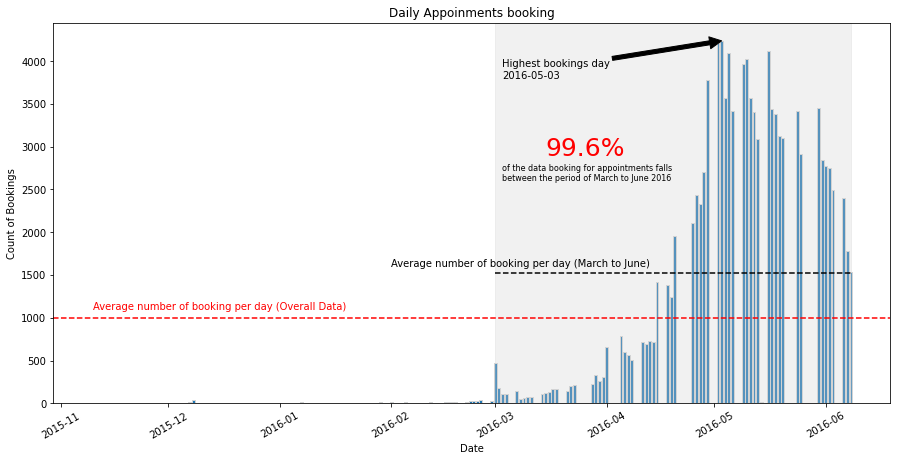

In [23]:
#df.sch_day.hist(bins=211, figsize=[15, 7], edgecolor='lightgray');
# plotting count of appointments bookings per day 

plt.figure(figsize=[15, 7])
plt.bar(df_sch['sch_day'], df_sch['count'], edgecolor='lightgray');
#plt.bar(df_sch['sch_day'], df_sch['count']);
plt.xticks(rotation=30);
plt.title('Daily Appoinments booking');
plt.ylabel('Count of Bookings');
plt.xlabel('Date');

plt.axvspan('2016-03-01', '2016-06-08', color='lightgray', alpha=.3);

plt.text(16875.0, 2900, '99.6%', color='red', fontsize=25);

plt.text(16863.0, 2600, 'of the data booking for appointments falls \nbetween the period of March to June 2016',
         color='black', fontsize=8 );

plt.annotate('Highest bookings day\n2016-05-03', xy=(16924.0, 4238), 
             xytext=(16863.0, 3800), arrowprops = dict(facecolor='black'));

plt.axhline(995, color='red', linestyle='--', label="Average");
plt.text(16749.0, 1100, 'Average number of booking per day (Overall Data)', color='red');

plt.hlines(y=1529, xmin = 16861.0, xmax = 16960.0, color='black', linestyle='--');
plt.text(16832.0, 1600, 'Average number of booking per day (March to June)', color='black');

plt.grid(False);

#plt.savefig('sch_per_day.png', pad_inches='tight');

**Research Question 2**: what are the insights and trends in variable `appointment date`?

- Appointments dates are distributed over the period of 40 days starting from the 29 April 2016 to 8 June 2016 , however dates which had appointments are only for 27 days

- Average appointments per day is 4093, however if we removed the outlier date '2016-05-14' where there was only 39 dates then the average will become 4249

In [24]:
# inspecting Variable appointment day
df_appo = pd.DataFrame(df.appo_day.value_counts())
df_appo = df_appo.reset_index(drop=False)
df_appo.columns = ['appo_day', 'counts']
df_appo.head()

,appo_day,counts
0,2016-06-06,4691
1,2016-05-16,4613
2,2016-05-09,4519
3,2016-05-30,4514
4,2016-06-08,4479


In [25]:
#Summery stats about the appointment day variable
print('Lowest Date recorded for appointments:', df_appo.appo_day.min())
print('Highest Date recorded for appointments:', df_appo.appo_day.max())
print('Duration span of booking appointments:', (df_appo.appo_day.max()- df_appo.appo_day.min()).days, 'days,',
      'however appointments are distributed over', df_appo.shape[0], 'days only')
print('Average appointments per day:', round(df_appo['counts'].mean(), 2))
print('Maximum appointments was recorded on 2016-06-06, with total appointments of', df_appo['counts'].max())
print('Minimum appointments was recorded on 2016-06-06, with total appointments of', df_appo['counts'].min())
print('Average appointments per day with outlier date "2016-05-14":', round(df_appo.counts[df_appo.counts > 100].mean(), 2))

Lowest Date recorded for appointments: 2016-04-29 00:00:00
Highest Date recorded for appointments: 2016-06-08 00:00:00
Duration span of booking appointments: 40 days, however appointments are distributed over 27 days only
Average appointments per day: 4093.37
Maximum appointments was recorded on 2016-06-06, with total appointments of 4691
Minimum appointments was recorded on 2016-06-06, with total appointments of 39
Average appointments per day with outlier date "2016-05-14": 4249.31


In [26]:
dates.date2num(pd.Series('2016-04-28'))
dates.date2num(pd.Series('2016-05-14'))


array([16935.])

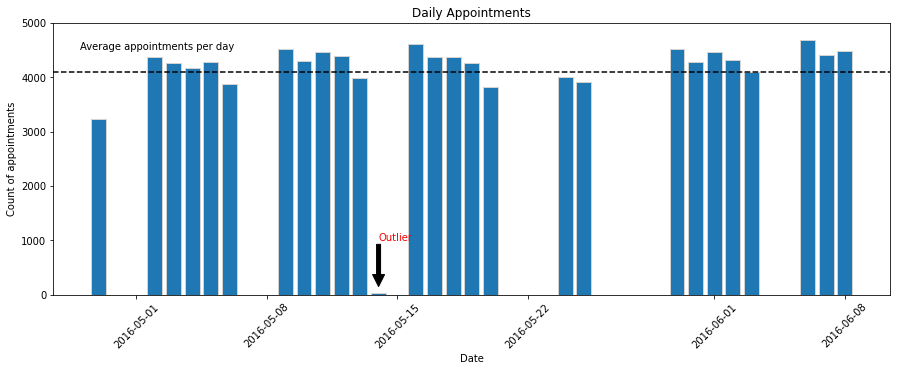

In [27]:
# plotting count of appointments per day 
plt.figure(figsize=[15, 5])
plt.bar(df_appo.appo_day, df_appo.counts, edgecolor='lightgray') #, edgecolor='lightgray'
plt.title('Daily Appointments');
plt.ylabel('Count of appointments');
plt.xlabel('Date');
plt.xticks(rotation=45);
plt.yticks([0,1000, 2000, 3000, 4000, 5000])
plt.axhline(4093.37, color='black', linestyle='--', label="Average");
plt.text(16919, 4500, 'Average appointments per day', color='black');
plt.grid(False);

plt.annotate(
    'Outlier',
    xy=(16935, 150), xytext=(16935, 1000), fontsize=10, color='r', arrowprops = dict(facecolor='black')); 

#plt.savefig('appo_per_day.png', pad_inches='tight');

**Research Question 3**: what are the insights and trends in variable `age`?

- Average appointments per age 1073, however infants age 0 and age 1 has the highest contribution with mean 1704 with almost 700 appointments above the dataset average
- Ages between 3 to 60 have an approximate uniform distribution with mean of "1487" appointments per day
- Ages +60 have a negative linear relationship with count of appointments
- Most of the counts per age falls within 1000 to 2000

In [28]:
# inspecting Variable age
df_age = pd.DataFrame(df.age.value_counts())
df_age = df_age.reset_index(drop=False)
df_age.columns = ['age', 'counts']
df_age.sort_values(by='age').head()
#df_age.describe()

,age,counts
0,0,3539
1,1,2273
8,2,1618
21,3,1513
55,4,1299


In [29]:
#Calculate average count of appointments for ages between 2 to 60
a = df_age[df_age.age > 2]
a = df_age[df_age.age <=60]
a.counts.mean()

1487.8688524590164

Text(1900, 20, 'Most of the counts per age \nfalls within 1000 to 2000')

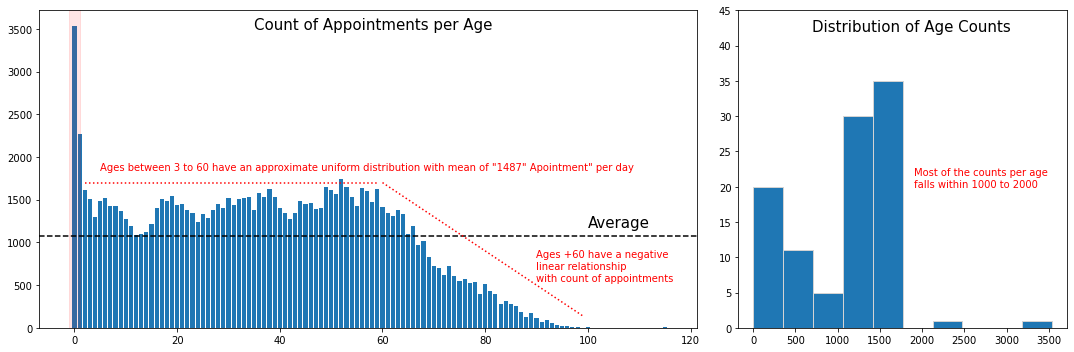

In [30]:
#modeling the distribution of appointments counts of age
x_uniform = [x for x in range(2,60,1)]
y_uniform = [1700 for x in range(2,60,1)]
x_decrease = [x for x in range(60,100,1)]
y_decrease = [x for x in range(1700,100, - len(x_decrease))]


#plotting 
f, (a0, a1) = plt.subplots(1, 2, figsize=[15, 5], gridspec_kw={'width_ratios': [2, 1]})
f.tight_layout()

a0.bar(df_age.age, df_age.counts);
a0.text(35, 3500,"Count of Appointments per Age", fontsize=15);
a0.axvspan(-1, 1, color='red', alpha=.1);
Avg_all = df_age.counts.mean()
a0.axhline(Avg_all, color = 'black', linestyle="--")
a0.text(100, (Avg_all+100),"Average", fontsize=15);

a0.plot(x_uniform, y_uniform, color='red', linestyle='dotted');
a0.text(5, 1850, 
        'Ages between 3 to 60 have an approximate uniform distribution with mean of "1487" Apointment" per day', 
        color='red') #note
a0.plot(x_decrease, y_decrease, color='red', linestyle='dotted');
a0.text(90, 550, 
        'Ages +60 have a negative \nlinear relationship \nwith count of appointments', 
        color='red') #note



a1.hist(df_age.counts, bins=10, edgecolor='lightgray');
plt.ylim(0, 45)
a1.text(700, 42, "Distribution of Age Counts", fontsize=15);
a1.text(1900, 20, 
        'Most of the counts per age \nfalls within 1000 to 2000', 
        color='red') #note


#plt.savefig('age_dist.jpg')

**Research Question 4**: what are the insights and trends in variable `neighborhood`?

- There are 81 neighborhoods in the dataset, Majority of the patients are residing in 8 main neighborhoods.
- Neighborhood can be distributed over 4 main categories:
    - Very High Demand Neighborhood: 8 out of 81 Neighborhood contributes to more than 31% of appointments count, with average of 4367 Appointments
    - High Demand Neighborhood: 13 Neighborhood covers 28% of total appointments, with average of 2439 Appointments
    - Medium Demand Neighborhood: 18 Neighborhood covers almost 24% of total appointments, with average of 1484 Appointments
    - Low Demand Neighborhood: 40 Neighborhood "More than 50% of all locations" covers 15% of total appointments, with average of 409 Appointments

In [31]:
# inspecting Variable neighborhood
df_nbr = pd.DataFrame(df.ngbr.value_counts())
df_nbr = df_nbr.reset_index(drop=False)
df_nbr.columns = ['nbr', 'counts']

df_nbr['Weight_per'] = round(((df_nbr['counts'] / df_nbr['counts'].sum())*100),2)
df_nbr['cumualtive_Weight'] = df_nbr['Weight_per'].cumsum()

df_nbr.head(5)

,nbr,counts,Weight_per,cumualtive_Weight
0,JARDIM CAMBURI,7717,6.98,6.98
1,MARIA ORTIZ,5805,5.25,12.23
2,RESISTÊNCIA,4430,4.01,16.24
3,JARDIM DA PENHA,3877,3.51,19.75
4,ITARARÉ,3514,3.18,22.93


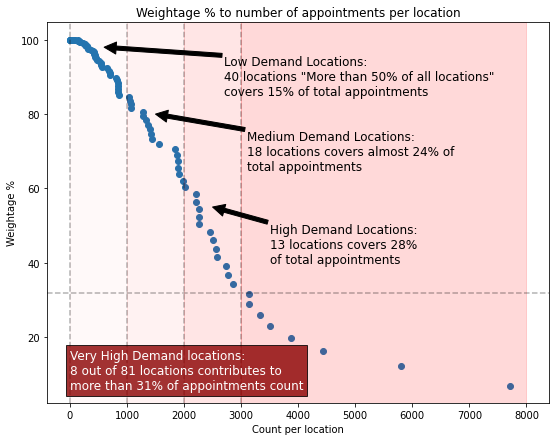

In [32]:
plt.figure(figsize= [9, 7])
plt.scatter(df_nbr.counts, df_nbr['cumualtive_Weight'])

plt.title('Weightage % to number of appointments per location')
plt.ylabel('Weightage %')
plt.xlabel('Count per location')

plt.axhline(32, linestyle='--', alpha=0.3, color='k')
plt.axvline(0, linestyle='--', alpha=0.3, color='k')
plt.axvline(1000, linestyle='--', alpha=0.3, color='k')
plt.axvline(2000, linestyle='--', alpha=0.3, color='k')
plt.axvline(3000, linestyle='--', alpha=0.3, color='k')

plt.axvspan(0,999, color='red', alpha=.025);
plt.axvspan(1000,1999, color='red', alpha=.05);
plt.axvspan(2000,2999, color='red', alpha=.10);
plt.axvspan(3000,8000, color='red', alpha=.15);

#Annotation for very high demand locaion
cat1 = plt.text(0, 6,
            'Very High Demand locations:\n8 out of 81 locations contributes to \nmore than 31% of appointments count',
                fontsize=12, color='white')
cat1.set_bbox(dict(facecolor='darkred', alpha=0.8, edgecolor='k'))


#Annotation for very high demand locaion
plt.annotate('High Demand Locations: \n13 locations covers 28% \nof total appointments', xy=(2500, 55), 
            xytext=(3500, 40), fontsize=12, color='k', arrowprops = dict(facecolor='black')); 

#Annotation for Medium demand locaion
plt.annotate('Medium Demand Locations: \n18 locations covers almost 24% of \ntotal appointments', xy=(1500, 80), 
             xytext=(3100, 65), fontsize=12, color='k', arrowprops = dict(facecolor='black')); 

#Annotation for low demand locaion
plt.annotate(
    'Low Demand Locations: \n40 locations "More than 50% of all locations" \ncovers 15% of total appointments',
    xy=(600, 98), xytext=(2700, 85), fontsize=12, color='k', arrowprops = dict(facecolor='black')); 

#plt.savefig('location_heatmap.jpg')

Create new variable `appointments_demand` to identify the category of the neighborhood

In [33]:
def neighborhoods_categories(x):
    """
    Function to categorize number of counts of appointments for each location into 4 buckets
    """
    if x <= 1000:
        return "Low"
    elif x > 1000 and x <= 2000:
        return "Medium"
    elif x > 2000 and x <= 3000:
        return "High"
    else:
        return "Very High"

#create new variable to categorize locations based on demand on each location
df_nbr['appointments_demand'] = df_nbr.counts.apply(neighborhoods_categories)

Summary statistics about each category of neighborhood variable

In [34]:
df_nbr_category = df_nbr.groupby('appointments_demand')['appointments_demand', 'counts', ].agg(['count', 'sum'])
df_nbr_category.drop(columns = ['appointments_demand'], inplace=True)
df_nbr_category.columns = df_nbr_category.columns.droplevel(0)
df_nbr_category.columns = ['counts', 'sums']
df_nbr_category['count_weight%'] = round(((df_nbr_category['counts'] / df_nbr_category['counts'].sum()) * 100), 2)
df_nbr_category['Sum_weight%'] = round(((df_nbr_category['sums'] / df_nbr_category['sums'].sum()) * 100), 2)
df_nbr_category['Average_per_location'] =  round((df_nbr_category['sums'] / df_nbr_category['counts']),0)

df_nbr_category = df_nbr_category.reindex(['Very High','High', 'Medium', 'Low'])
df_nbr_category = df_nbr_category.reset_index(drop=False)

color_map = plt.cm.get_cmap('Pastel1')
color_map_reversed = color_map.reversed()
df_nbr_category.style.background_gradient(cmap =color_map_reversed)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,appointments_demand,counts,sums,count_weight%,Sum_weight%,Average_per_location
0,Very High,8,34939,9.880000,31.610000,4367.000000
1,High,13,31704,16.050000,28.690000,2439.000000
2,Medium,18,26718,22.220000,24.170000,1484.000000
3,Low,42,17160,51.850000,15.530000,409.000000


**Research Question 5**: what are the insights and trends in Binaty variables
`scholarship` - `hipertension` - `diabetes` - `alcoholism` - `handcap` - `sms`?
- Almost 10% of all appointments made were for patients covered by the social support program
- 20% of all appointments made were for patients suffering from Hypertension
- 7% of all appointments made were for patients suffering from Hypertension
- 3% of all appointments made were for patients suffering from alcohol problem
- 2% of all appointments made were for patients are handicapped
- 32% of all appointments made were for patients have received remider sms's about appointment timing


In [35]:
#list of the binary variables
binary_variables = ['scholarship', 'hipertension', 'diabetes', 'alcoholism','handcap', 'sms', 'no_show']

#Capturing the relevant data and wrangling it for conclusions
binary = df[binary_variables].stack(level=0)
binary = pd.DataFrame(binary)
binary.reset_index(drop=False, inplace =True)
binary.columns = ['level_0', 'level_1', 'value']


In [36]:
(binary.groupby('level_1')['value'].sum() / binary.level_1.value_counts()) * 100

alcoholism       3.040146
diabetes         7.186869
handcap          2.025859
hipertension    19.725663
no_show         20.189828
scholarship      9.827092
sms             32.104306
dtype: float64

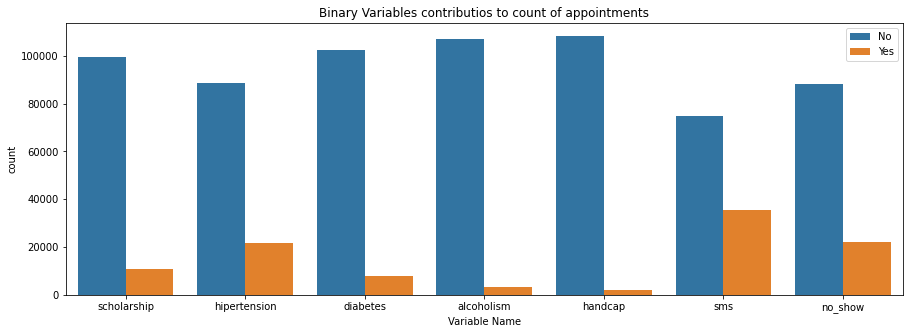

In [37]:
plt.figure(figsize=[15,5]);
sns.countplot(data=binary, x='level_1', hue='value');
plt.title('Binary Variables contributios to count of appointments');
plt.xlabel('Variable Name');
plt.legend(['No', 'Yes']);

#plt.savefig('binary_attr.jpg')

**Research Question 6**: what are the insights and trends in variable `Patient id`?
- Total patients on the dataset are 62,298, majority of them (60.87%) have made 1 appointment during the period of 7 months, contributing to 34.31% of all appointments made
- Patients who made more than 1 appointment are distributed over a very huge range starting from 2 appointments up to some patients who made 88 appointment, contributing to almost 65% of all appointments made
- Assuming that patients who make more than 7 appointment on average are chronic patients, and patients who make more than 1 appointment but not more than 7 appointments are frequent patients *"Identifing Frequent patients as those ones who make at least 1 appointment for each month in the dataset"*, we divide the patients into 3 categories:
    - First Time patient
    - frequent patient
    - Chronic Patient
- Patients who are categorized as frequent are having the highest contribution to overall appointments made 58.64%, thus we divid the patients to 2 categories those who are in "2 to 7" category and those who are not.

In [38]:
# inspecting Variable neighborhood
df_pat = pd.DataFrame(df.pat_id.value_counts())
df_pat.reset_index(drop=False, inplace=True)
df_pat.columns = ['Patient_id', 'counts']


df_pat.head()

,Patient_id,counts
0,822145925426128,88
1,99637671331,84
2,26886125921145,70
3,33534783483176,65
4,871374938638855,62


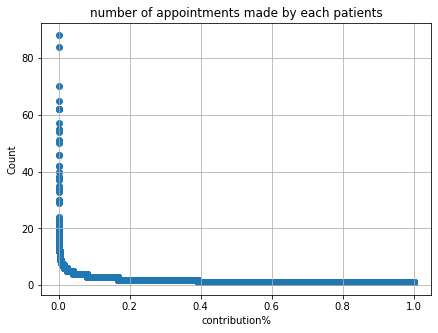

In [39]:
x = np.linspace(0, 1,len(df_pat.counts))

plt.figure(figsize = [7, 5]);
plt.scatter(x, df_pat.counts);
plt.grid()
plt.title('number of appointments made by each patients');
plt.xlabel('contribution%');
plt.ylabel('Count');
#plt.ylim(0, 1)

#plt.savefig('appointments_by_patient.jpg')


Divide the patient into 3 categories(First Time, frequent and chronic)

In [40]:
def freq(x):
    if x == 1:
        return 'first time'
    elif x > 1 and x < 8:
        return 'frequent'
    else:
        return 'chronic'

df_pat['frequency'] = df_pat['counts'].apply(freq)
df_pat.head()

,Patient_id,counts,frequency
0,822145925426128,88,chronic
1,99637671331,84,chronic
2,26886125921145,70,chronic
3,33534783483176,65,chronic
4,871374938638855,62,chronic


Summary statistics about the patient categories newly constructed

In [41]:
df_pat2 = df_pat.groupby('frequency')['counts', 'Patient_id'].agg(['sum', 'count'])
df_pat2.reset_index(drop=False, inplace=True)
df_pat2.columns = df_pat2.columns.droplevel(0)
df_pat2.columns = ['frequency','sum_appointments', 'count_patients', 'sum', 'count']
df_pat2 = df_pat2[['frequency','sum_appointments', 'count_patients']].copy()
df_pat2['weight_appointments'] = round(((df_pat2['sum_appointments'] / df_pat2['sum_appointments'].sum()) * 100),2)
df_pat2['weight_patients'] = round(((df_pat2['count_patients'] / df_pat2['count_patients'].sum()) * 100),2)
df_pat2['avg_appointments'] = round(df_pat2['sum_appointments'] / df_pat2['count_patients'],2)


df_pat2

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,frequency,sum_appointments,count_patients,weight_appointments,weight_patients,avg_appointments
0,chronic,7786,638,7.04,1.02,12.20
1,first time,37920,37920,34.31,60.87,1.00
2,frequent,64815,23740,58.64,38.11,2.73


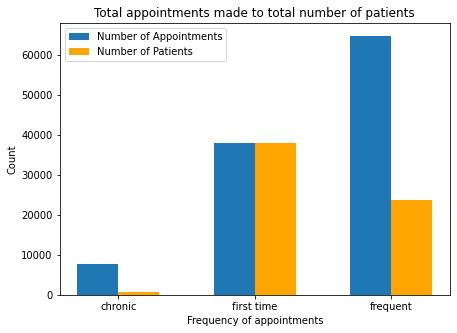

In [42]:
#plotting to check the stats for total appointments made to total number of patients
x = np.array([1,2,3])

plt.figure(figsize = [7, 5])
width = 0.3
plt.bar(x, df_pat2.sum_appointments, width, color='tab:blue', label='Number of Appointments');
plt.bar(x + width, df_pat2.count_patients,width, color='orange', label='Number of Patients');
plt.xticks((x+width/2) , ['chronic', 'first time', 'frequent']); 
plt.title('Total appointments made to total number of patients');
plt.xlabel('Frequency of appointments')
plt.ylabel('Count')
plt.legend();

#plt.savefig('appointments_Vs_Patients_Categories.jpg')

**Research Question 7**: is there a relationship between variable `age` and target variable `no-show`?

- Converting Age variable to categories of 10 years interval, will see that the higher the age the average of no show gets decreased

- In the graph below we can see that the average no show for people with greater than 40 is 5% less than the ages from 0 to 40, testing the statistical significant of this variance we can see that it's almost 0.0 probability that the variance is due to random chance


Building a function to split ages into categories of 10 years interval

In [43]:
#distribute age data to bucket
def age_buckets(x):
    if x <= 10:
        return "0 - 10"
    elif x <= 20:
        return "11 - 20"
    elif x <= 30:
        return "21 - 30"
    elif x <= 40:
        return "31 - 40"
    elif x <= 50:
        return "41 - 50"
    elif x <= 60:
        return "51 - 60"
    else:
        return "+61"
    

In [44]:
df['age_categ'] = df.age.apply(age_buckets)
age_noshow = df.groupby('age_categ')['no_show'].mean()
arrange_ages = ["0 - 10", "11 - 20", "21 - 30", "31 - 40", "41 - 50", "51 - 60", "+61"]
age_noshow = age_noshow.reindex(arrange_ages)

#Bucketing age into 2 categories + or -40
df['age_categ2'] = df.age.apply(lambda x: "0 - 40" if x <=40 else "Above 40")

#Grouping the age categories and calculate the average no show
age_noshow2 = df.groupby('age_categ2')['no_show'].mean()


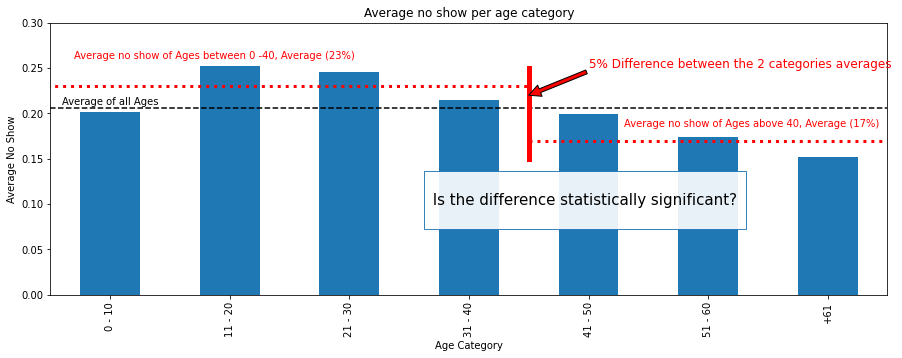

In [45]:
#Visual the grouped average per age category

x_0_40 = [-1, 1, 2, 3.5]
y_0_40 = [0.23, 0.23, 0.23, 0.23]

x_above40 = [3.5, 5, 6.5]
y_above40 = [0.17, 0.17, 0.17]

x_var = [3.5, 3.5]
y_var = [0.25, 0.15]

plt.figure(figsize=[15, 5]);
age_noshow.plot(kind='bar', color='tab:blue');
plt.title('Average no show per age category');
plt.ylabel('Average No Show');
plt.xlabel('Age Category');

plt.ylim(0, 0.30)

plt.axhline(age_noshow.mean(), color='k', linestyle='--');
plt.text(-0.4, 0.21 , "Average of all Ages");

plt.plot(x_0_40, y_0_40, color= 'r', linestyle='dotted', linewidth = 3);
plt.text(-0.3, 0.26 , "Average no show of Ages between 0 -40, Average (23%)", color='r');

plt.plot(x_above40, y_above40, color= 'r', linestyle='dotted', linewidth = 3);
plt.text(4.3, 0.185 , "Average no show of Ages above 40, Average (17%)", color='r');

plt.plot(x_var, y_var, linewidth = 5, color='red');
plt.annotate('5% Difference between the 2 categories averages ', 
             xy=(3.5, 0.22), xytext=(4, 0.25), fontsize=12, color='r', arrowprops = dict(facecolor='r')); 

box = plt.text(2.66, 0.08,
            '\n Is the difference statistically significant? \n',
                fontsize=15, color='k')
box.set_bbox(dict(facecolor='w', alpha=0.9, edgecolor='tab:blue'))

#plt.savefig('Age_bucket_avg.jpg')

Test significance in variable Age for age above or below 40

In [46]:
#test significance in variable Age for age above or below 40

array_under40 = np.array(df['no_show'][df['age'] <= 40])
array_above40 = np.array(df['no_show'][df['age'] > 40])
array_combined = np.concatenate((array_under40, array_above40))

means_diff = []
mean_under40 = []
mean_above40 = []

for i in range(10000):
    array_combined_perm = np.random.permutation(array_combined)
    
    perm_under = array_combined_perm[:len(array_under40)]
    perm_above = array_combined_perm[len(array_under40):]
    diff = perm_under.mean() - perm_above.mean()
    
    mean_under40.append(perm_under.mean())
    mean_above40.append(perm_above.mean())
    means_diff.append(diff)
        
array_means_diff = np.array(means_diff)
array_means_under = np.array(mean_under40)  
array_means_above = np.array(mean_above40)



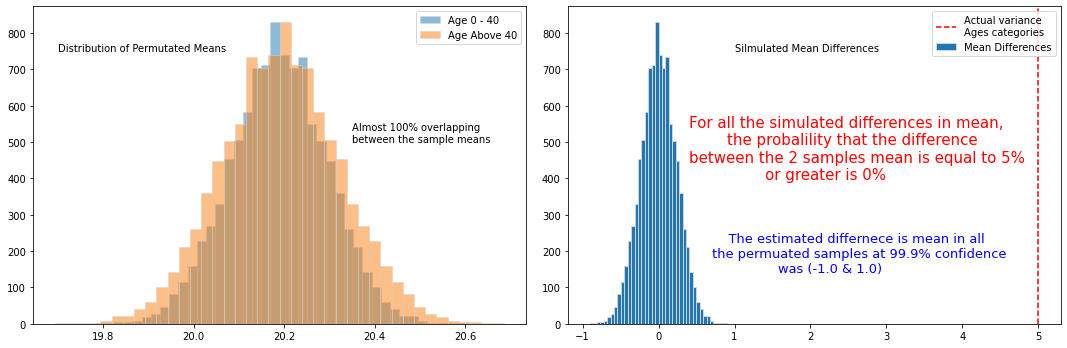

In [47]:
#visualizing the hypothesis testing result

mean_diff_note = """
For all the simulated differences in mean, 
        the probalility that the difference 
between the 2 samples mean is equal to 5% 
                or greater is 0%
"""
mean_diff_note2 = """
    The estimated differnece is mean in all 
the permuated samples at 99.9% confidence 
                was (-1.0 & 1.0)
"""


f, (a0, a1) = plt.subplots(1, 2, figsize=[15, 5], gridspec_kw={'width_ratios': [1, 1]})
f.tight_layout()

a0.hist(array_means_under * 100, alpha=.5, bins=40, edgecolor='lightgray', label='Age 0 - 40');
a0.hist(array_means_above * 100, alpha=.5, bins=40, edgecolor='lightgray', label='Age Above 40');
a0.text(19.7, 750, "Distribution of Permutated Means")
a0.text(20.35, 500, "Almost 100% overlapping \nbetween the sample means")
a0.legend();

a1.hist(array_means_diff * 100, bins=40, edgecolor='lightgray', label='Mean Differences');
a1.axvline(5, linestyle='--', c='r', label='Actual variance \nAges categories')
a1.text(1, 750, "Silmulated Mean Differences")
a1.text(0.4, 350, mean_diff_note, color='r', fontsize = 15)
a1.text(0.7, 100, mean_diff_note2, color='b', fontsize = 13)
a1.legend(loc='upper right');

#plt.savefig('age_buckets_variance1.jpg')

**Research Question 8**: Is there a relationship between variable `day_diff` "difference in days between appointment date and scheduling date" and target variable `no-show`?

- Calculating the difference in days between Scheduling date and appointment date, we found out that almost 35% of the patients make thier appointments in the same day, 30% within 10 days and the other 35% of the scheduling are disributed over the whole period of 7 months however most of the records are after march 2016

- Increase in delay in days difference we can see that the No show% increases severally as detailed below:
    - 20% increase in noshow% between the first 2 categories
    - 26% increase in noshow% between the first and last category

In [48]:
#merging the location category with the main dataframe
df = df.merge(df_nbr, how='left', left_on = 'ngbr', 
              right_on='nbr').drop(columns=['nbr', 'counts', 'Weight_per', 'cumualtive_Weight'])

In [49]:
def days_grouping(x):
    if x == 0:
        return "same day"
    elif x > 1 and x < 11:
        return "within 10 days"
    else:
        return "greater than 10 days"

In [50]:
df['days_group'] = df.day_diff.apply(days_grouping)

In [51]:
day_difference_df = pd.DataFrame(
    {'AVG':df.groupby('days_group')['no_show'].mean(), 'counts':df.groupby('days_group')['no_show'].count()})

#df.groupby('days_group')['no_show'].count().plot(kind='pie', autopct="%.1f%%", pctdistance=0.5);
day_difference_df = day_difference_df.reindex(['same day', 'within 10 days', 'greater than 10 days'])
day_difference_df['counts_weight%'] = (day_difference_df.counts / day_difference_df.counts.sum()) * 100

day_difference_df

,AVG,counts,counts_weight%
days_group,,,
same day,0.046471,38562,34.891107
within 10 days,0.254149,32300,29.225215
greater than 10 days,0.310472,39659,35.883678


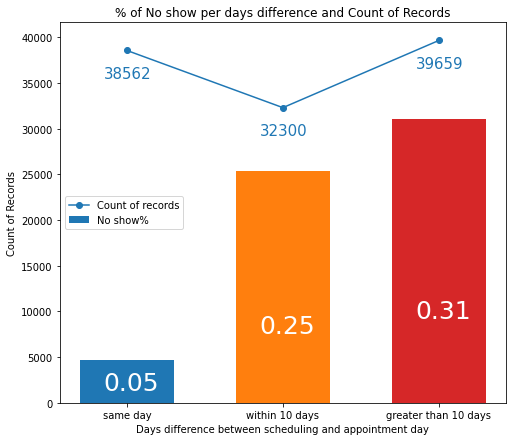

In [52]:
x_days = np.arange(1, 4)
x_day_values = list(day_difference_df.index)

width = 0.6

plt.figure(figsize=[8, 7])

plt.bar(x_days + (width / 2), day_difference_df.AVG * 100000, width,color=['tab:blue', 'tab:orange', 'tab:red'], 
        label='No show%');
plt.plot(x_days + (width / 2), day_difference_df.counts, marker='o', label='Count of records');
plt.xticks((x_days + width/2) , x_day_values); 
plt.title('% of No show per days difference and Count of Records')
plt.xlabel('Days difference between scheduling and appointment day')
plt.ylabel('Count of Records')
plt.legend()

for i in x_days:
    plt.text(x_days[i - 1] + (width/4), day_difference_df.AVG.iloc[i - 1] * 30000, 
             str(round(day_difference_df.AVG.iloc[i - 1],2)), fontsize = 25, color='w')
    
    plt.text(x_days[i - 1] + (width/4), day_difference_df.counts.iloc[i - 1] - 3000, 
             str(round(day_difference_df.counts.iloc[i - 1],2)), fontsize = 15, color='tab:blue')
    
#plt.savefig('Day_Diff_Categories.jpg')

**Research Question 9**: Is there a relationship between variable `appointments_demand` "appointments demand category per neighborhood" and target variable `no-show`?

- Considering how much appointments the facilities receive, it doesn't seem that the load on the facility has an effect on the whether the patient will show up to his appointment or not

In [53]:
location_df = pd.DataFrame(
    {'AVG':df.groupby('appointments_demand')['no_show'].mean(), 'counts':df.groupby('appointments_demand')['no_show'].count()})

index_list = ['Low', 'Medium', 'High', 'Very High']
location_df = location_df.reindex(index_list)
location_df['counts_weight%'] = (location_df.counts / location_df.counts.sum())

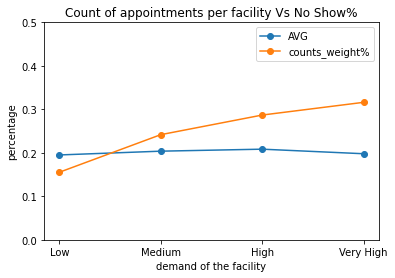

In [54]:
location_df[['AVG', 'counts_weight%']].plot(marker='o');
plt.xticks([x for x in range(4)] ,index_list);
plt.ylim([0,0.5]);
plt.title('Count of appointments per facility Vs No Show%');
plt.ylabel('percentage');
plt.xlabel('demand of the facility');
#plt.savefig('location_avg_count.jpg')

**Research Question 10**: Is there a relationship between variable `frequency` "patients who made 2 to 7 appointments and others" and target variable `no-show`?
 
- Patients who made 2 to 7 appointments has 21% No-show%, while other categories have No-show% of 18.7% 
- Variance in No-show% between the 2 categorizations is 2.3%

In [55]:
#merging the patience frequency of making appointments with the main dataframe
df = df.merge(df_pat, how='left', left_on = 'pat_id', 
              right_on='Patient_id').drop(columns=['Patient_id', 'counts'])

In [56]:
#creating new variable to to identify 
df['frequency2'] = df.frequency.apply(lambda x: 1 if x =='frequent' else 0)

,AVG,counts,counts_weight%
frequency2,,,
0,0.187984,45706,0.41355
1,0.211710,64815,0.58645


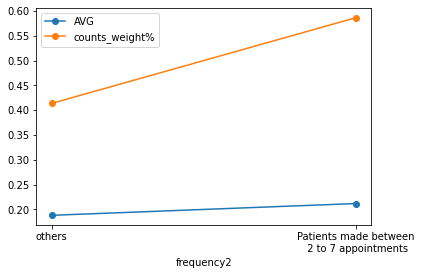

In [57]:
frequency_df = pd.DataFrame(
    {'AVG':df.groupby('frequency2')['no_show'].mean(), 'counts':df.groupby('frequency2')['no_show'].count()})

frequency_df['counts_weight%'] = (frequency_df.counts / frequency_df.counts.sum())
frequency_df[['AVG', 'counts_weight%']].plot(marker='o');
plt.xticks([0, 1], ['others', 'Patients made between\n 2 to 7 appointments'])

frequency_df['AVG'].iloc[1] - frequency_df['AVG'].iloc[0]
frequency_df

**Research Question 11**: Is there a relationship between variable `frequency` "patients who made 2 to 7 appointments and others" and target variable `no-show`?
 
- Female patients contribute to almost 65% of all the data records, however it's seems that gender doesn't have an effect on No Show% considering:
    - No-Show% for Males is 20.3%
    - No-Show% for Females is 19.9%

In [58]:
gender_df = pd.DataFrame(
    {'AVG':df.groupby('gender')['no_show'].mean(), 'counts':df.groupby('gender')['no_show'].count()})

gender_df['counts_weight%'] = (gender_df.counts / gender_df.counts.sum())
gender_df

,AVG,counts,counts_weight%
gender,,,
F,0.203115,71836,0.649976
M,0.199638,38685,0.350024


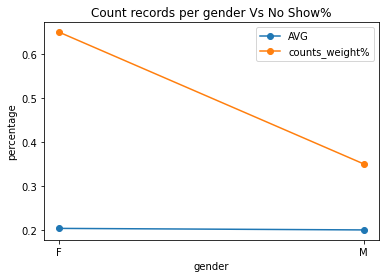

In [59]:

gender_df[['AVG', 'counts_weight%']].plot(marker='o');
plt.xticks([0 , 1] ,['F', 'M']);
plt.title('Count records per gender Vs No Show%');
plt.ylabel('percentage');
plt.xlabel('gender');

#plt.savefig('gender_avg_count.jpg')


***
- ***Function to test and visualize (hypothesis testing for significance)*** 
Below are 2 functions to
1. Function `stat_test` to test significance in variance for binary variables 
2. Function `hist_plot_sig_test` to visualize the significance test result

In [60]:
def stat_test(col_name, number_of_trials):
    """
    Function to simulate statistical significance between 2 categories of a variable 
    and the noshow% affected by the categories
    """
    grouped_mean = df.groupby(col_name)['no_show'].mean()
    
    significance_value = (grouped_mean[0] - grouped_mean[1])
    array1 = np.array(df['no_show'][df[col_name] == 0])
    array2 = np.array(df['no_show'][df[col_name] == 1])
    array_combined = np.concatenate((array1, array2))
    
    means_list_1 = []
    means_list_2 = []
    means_diff_list = []
    
    for i in range(number_of_trials):
        array_combined_perm = np.random.permutation(array_combined)
        array1_permutation = array_combined_perm[:len(array1)]
        array2_permutation = array_combined_perm[len(array2):]
        diff = array1_permutation.mean() - array2_permutation.mean()
        
        means_list_1.append(array1_permutation.mean())
        means_list_2.append(array2_permutation.mean())
        means_diff_list.append(diff)
        
    means_diff_array = np.array(means_diff_list)
    means_array_1 = np.array(means_list_1)  
    means_array_2 = np.array(means_list_2)
    
    return (means_diff_array, means_array_1, means_array_2, significance_value, col_name)

def hist_plot_sig_test(data1, data2, data3, line_value,bins=40, label_1="", label_2="", label_3="", name=""):
    
    """
    visualize the simualtion result
    """
    
    f, (axis1, axis2) = plt.subplots(1, 2, figsize=[15, 5], gridspec_kw={'width_ratios': [1, 1]})
    f.tight_layout()
    axis1.hist(data1, alpha=.5, bins=bins, edgecolor='lightgray', label=label_1);
    axis1.hist(data2, alpha=.5, bins=bins, edgecolor='lightgray', label=label_2);
    axis1.legend();
    
    axis2.hist(data3, bins=bins, edgecolor='lightgray', label=label_3);
    axis2.axvline(line_value, linestyle='--', c='r', label="Test Value")
    #plt.text(line_value * 1.05, 20, str(round(line_value,2)), color='r')#, rotation=90
    box_viz = plt.text(line_value, 10, str(round(line_value,2)),color='r')
    box_viz.set_bbox(dict(facecolor='w', alpha=0.9)) #, edgecolor='tab:blue'
    axis2.legend();
    name = name+'_Permutation.jpg'
    #plt.savefig(name)

### Data Cleaning 2

1. Convert Age category column to a binary column with name "age_40_and_less" and value 0, 1
2. Change column name "frequency" to frequency_2_7 with values 0, 1
3. Split columns "day_diff" to 3 binary columns with values 0, 1
4. Create new dataframe with variables that only have significant contribute to No-Show%

- ***Convert Age category column to a binary column with name "age_40_and_less" and value 0, 1***

In [61]:
#create binary value from age columns to check age category
df['age_40_and_less'] = df.age_categ2.apply((lambda x: 1 if x =='Above 40' else 0))

- ***Change column name "frequency" to frequency_2_7 with values 0, 1***

In [62]:
#change name of column frequency2
df['frequenct_2_7'] = df.frequency2.copy()

- ***Split columns "day_diff" to 3 binary columns with values 0, 1***

In [63]:
#splitting the columns "day_diff" to 3 binary columns each column for 1 category
df['app_sameday'] = df.days_group.apply((lambda x: 1 if x =='same day' else 0))
df['app_10_days'] = df.days_group.apply((lambda x: 1 if x =='within 10 days' else 0))
df['app_more_10days'] = df.days_group.apply((lambda x: 1 if x =='greater than 10 days' else 0))


- ***Create new dataframe with variables that only have significant contribute to No-Show%***

In [64]:
# variables to remove
"""
variables_to_drop = ['pat_id', 'gender', 'sch_day', 'age', 'ngbr', 'hour', 'day_diff', 'age_categ', 'age_categ2',
                    'appointments_demand', 'frequency', 'frequency2', 'days_group']
"""
# Isolate the variables that have significant contribute to No-Show%
variables_to_keep = ['appo_id', 'appo_day','scholarship', 'hipertension', 'diabetes', 'alcoholism', 'handcap',
       'sms','age_40_and_less', 'frequenct_2_7', 'app_sameday', 'app_10_days', 'app_more_10days','no_show']

In [65]:
df_new = df[variables_to_keep].copy()

#rename the newdataframe columns
df_new.columns = ['appointment_id', 'appointment_date','scholarship', 'hipertension', 'diabetes', 
                  'alcoholism', 'handcap','sms','age_40_and_less', 'frequenct_2_7', 'app_sameday',
                  'app_10_days', 'app_more_10days', 'no_show']


**Research Question 12**: Is there a relationship between binary variable `scholarship` - `hipertension` - `diabetes` - `alcoholism` - `handcap` - `sms` and target variable `no-show`?
 
- Variables `Diabetes` - `Alcoholism` - `Handcap` doesn't have any representing weightage in the dataset and also there is no dinstinctive representation when we try to compare the variable average on the dataset for patients who showed up and those who didn't
- Variables `Scholarship` - `hipertension` - `sms received` seems to have difference in weightage when compared to whether the patient showed up or not, therefore we conducted a hypothesis testing on the 3 variables and it was concluded that they have statistical siginificance in contributing to No-Show%

In [66]:
vars_df_new = [x for x in df_new.columns[2:8]]
mask_show = df_new['no_show'] == 0
mask_noshow = df_new['no_show'] == 1

stats_show = df_new[vars_df_new][mask_show].mean()
stats_noshow = df_new[vars_df_new][mask_noshow].mean()

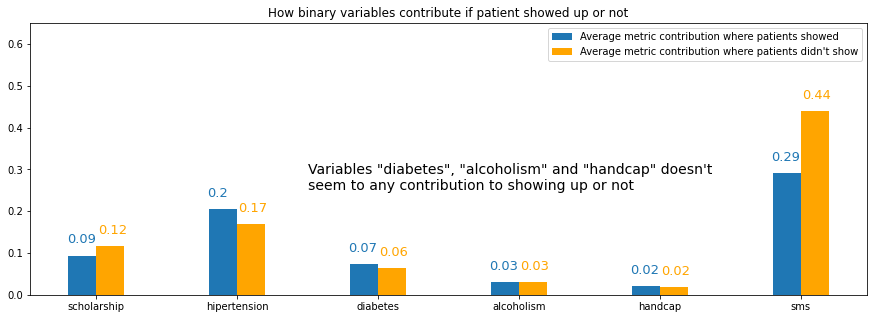

In [67]:
xxx_vars = np.arange(len(vars_df_new))

plt.figure(figsize = [15, 5])
width = 0.2

plt.title('How binary variables contribute if patient showed up or not')

plt.bar(xxx_vars, stats_show, width, color='tab:blue', 
        label='Average metric contribution where patients showed');
plt.bar(xxx_vars + width, stats_noshow, width, color='orange', 
        label='Average metric contribution where patients didn\'t show');

plt.xticks((xxx_vars + width / 2) , vars_df_new); 
plt.legend();

plt.ylim(0,.65)

plt.text(1.6, .25,
         'Variables "diabetes", "alcoholism" and "handcap" doesn\'t \nseem to any contribution to showing up or not',
        fontsize=14)

for i in xxx_vars:
    plt.text(xxx_vars[i]-0.11, stats_show[i] + 0.03, 
             str(round(stats_show[i],2)), color='tab:blue', fontsize = 13)
    
    plt.text(xxx_vars[i]+0.11, stats_noshow[i] + 0.03, 
             str(round(stats_noshow[i],2)), color='orange', fontsize = 13) #, fontsize = 15

#plt.savefig('contribution_binary.jpg')

Test significance for variables `Scholarship` - `hipertension` - `sms received`

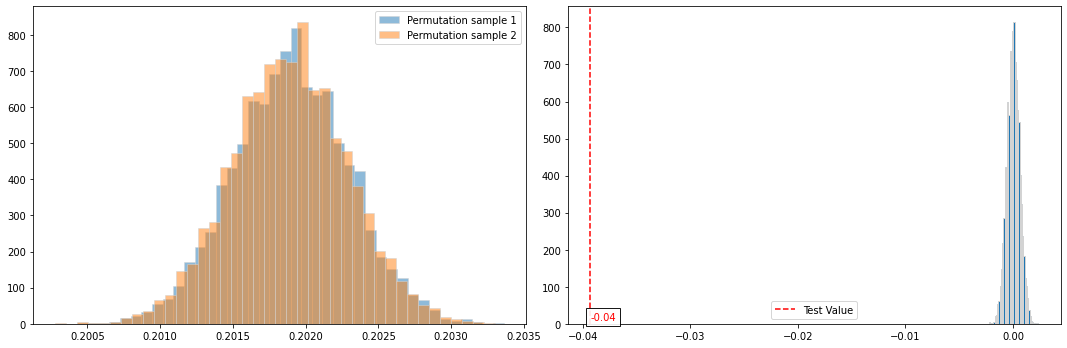

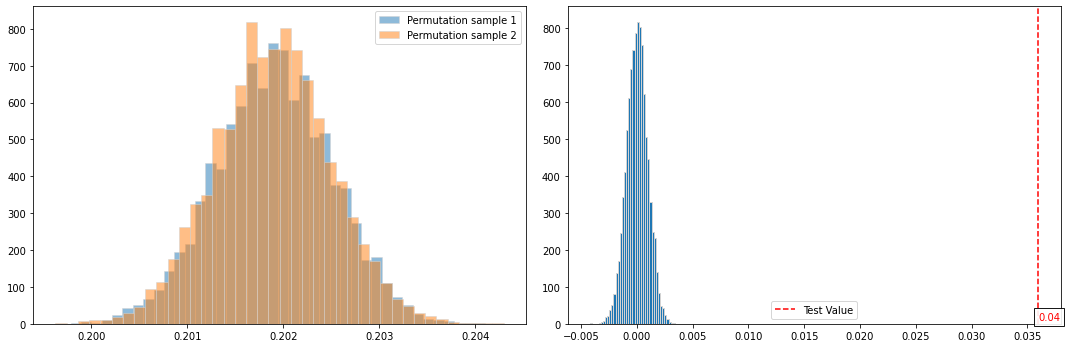

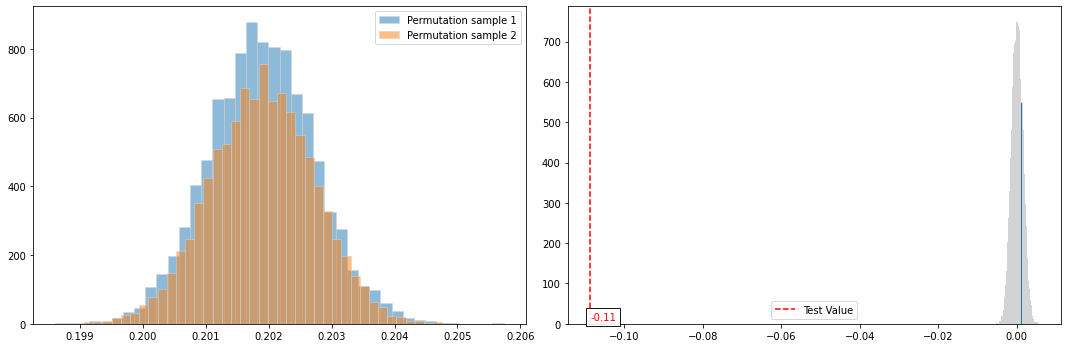

In [68]:

vars_df_new = ['scholarship', 'hipertension','sms']

for i in vars_df_new:
    a, b, c, d, colname = stat_test(i, 10000)
    hist_plot_sig_test(b, c, a, d,label_1="Permutation sample 1", label_2="Permutation sample 2", name=colname)


### Data Cleaning 3

1. Drop columns which has no significant contribution to No-Show%
2. Create new variable "Scenarios" which combines all the features in the dataset into 1 string value
3. Create new dataframe grouping the scenarios sums and count

- ***Drop columns which has no significant contribution to No-Show%***

In [69]:
# Identify relevant variables to include in a new dataframe
vars_new2 = ['appointment_id', 'appointment_date', 'scholarship', 'hipertension', 'sms', 'age_40_and_less','frequenct_2_7', 'app_sameday', 'app_10_days', 'app_more_10days', 'no_show']

# create new dataframe with relvant variables
df_new = df_new[vars_new2].copy()

- ***Create new variable "Scenarios" which combines all the features in the dataset into 1 string value***

In [70]:
# creating new variables scenarios which identify all the possible combinatons from all the relevant variables
df_new['scen'] = df_new['scholarship'].map(str)+df_new['hipertension'].map(str)+df_new['sms'].map(str)+df_new['age_40_and_less'].map(str)+df_new['frequenct_2_7'].map(str)+df_new['app_sameday'].map(str)+df_new['app_10_days'].map(str)+df_new['app_more_10days'].map(str)

In [71]:
df_new.head()

,appointment_id,appointment_date,scholarship,hipertension,sms,age_40_and_less,frequenct_2_7,app_sameday,app_10_days,app_more_10days,no_show,scen
0,5642903,2016-04-29,0,1,0,1,1,1,0,0,0,01011100
1,5642503,2016-04-29,0,0,0,1,1,1,0,0,0,00011100
2,5642549,2016-04-29,0,0,0,1,1,1,0,0,0,00011100
3,5642828,2016-04-29,0,0,0,0,1,1,0,0,0,00001100
4,5642494,2016-04-29,0,1,0,1,0,1,0,0,0,01010100


- ***Create new dataframe which has the scenarios sum and count***

In [72]:
# Creating new data frame grouping the scenario and relating to noshow%

grouped_scen_mean = df_new.groupby('scen')['no_show'].mean()
grouped_scen_count = df_new.groupby('scen')['no_show'].count()
grouped_scen = pd.DataFrame({'AVG':grouped_scen_mean, 'counts':grouped_scen_count})
grouped_scen['counts_weight'] = grouped_scen['counts'] / grouped_scen['counts'].sum()
grouped_scen = grouped_scen.sort_values(by='counts_weight', ascending=False)

grouped_scen['counts_weight'] = round(grouped_scen['counts_weight'], 2)
grouped_scen['AVG'] = round(grouped_scen['AVG'], 2)


In [73]:
grouped_scen.head()

,AVG,counts,counts_weight
scen,,,
00001100,0.05,10959,0.10
00000100,0.06,8554,0.08
00101001,0.33,5939,0.05
00001001,0.36,5400,0.05
00011100,0.03,4958,0.04


<a id='conclusions'></a>
## Conclusions 

1. For all locations (81 facility), it's expected that they will be receiving on average amount of 4250 appointments per day, with 95% confidence interval, we can conclude that thery will be having between 4125 to 4355 appointments per day <br><br>
2. The Estimated No-Show% for any given day is between (19.5% to 20.9%) at a 95% confidence interval<br><br>
3. There are 5 main  contributing factors on whether the patient attend to his appointment in the scheduled or not? Contributing factors are:
    - The duration between the appointment scheduling date and Appointment date "The more the duration increased the less probable the patient to attend".
    - The frequency of appointments "Whether the patient is making his first appointment or not?"
    - Age or the patients
    - Whether the patient recieved a reminder sms about his appointment date or not?
    - Does the patient suffer from hipertension?
<br><br>
4. it was concluded that total of 80 scenarios covering all the possible combinations of all relevant features in the dataset, out of the 80 scenarios, **there are 24 scenarios where the average No-Show% is 27% and these scenarios covers a total of 80% of all the No-shows cases and contributing to almost 60% of all the data records**.

- ***Estimate total appointments expected per day***

In [74]:
# create dataframe for appointments made each date
no_app_day = df_new.groupby('appointment_date')['scen'].count()

# Delete outlier '2016-05-14'
no_app_day = no_app_day.drop(pd.Timestamp('2016-05-14'), axis=0)
no_app_day.head()

appointment_date
2016-04-29    3235
2016-05-02    4376
2016-05-03    4255
2016-05-04    4167
2016-05-05    4272
Name: scen, dtype: int64

In [75]:
# Estimation through bootstraping for number of appointments per day

no_days_list = []
for i in range(100000):
    choice = np.random.choice(no_app_day, len(no_app_day))
    no_days_list.append(choice.mean())
    
no_days_array = np.array(no_days_list)

(4125.923076923077, 4356.7692307692305, 4249.482803076923)

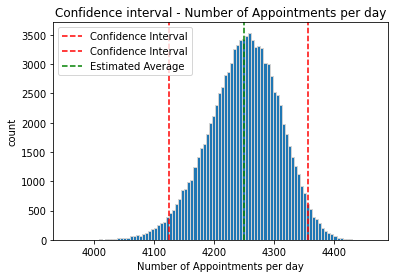

In [76]:
# Visualizing the bootstraping result
plt.hist(no_days_array, edgecolor='lightgray', bins=100) #

percentile_025 = np.percentile(no_days_array, 2.5)
percentile_975 = np.percentile(no_days_array, 97.5)

plt.axvline(percentile_025, color='r', ls='--', label='Confidence Interval')
plt.axvline(percentile_975, color='r', ls='--', label='Confidence Interval')
plt.axvline(no_days_array.mean(), color='g', ls='--', label='Estimated Average')

plt.title('Confidence interval - Number of Appointments per day')
plt.xlabel('Number of Appointments per day')
plt.ylabel('count')
plt.legend()

#plt.savefig('Estimated_count_per_day.jpg')

np.percentile(no_days_array, 2.5), np.percentile(no_days_array, 97.5), no_days_array.mean()

- ***Estimate expected No-Show% per day***

In [77]:
# create dataframe for noshow% per day
avg_noshow_day = df_new.groupby('appointment_date')['no_show'].mean()

# Delete outlier '2016-05-14'
avg_noshow_day = avg_noshow_day.drop(pd.Timestamp('2016-05-14'), axis=0)
#avg_noshow_day

In [78]:
# Estimation through bootstraping for number of appointments per day

avg_noshow_list = []
for i in range(100000):
    choice2 = np.random.choice(avg_noshow_day, len(avg_noshow_day))
    avg_noshow_list.append(choice2.mean())
    
avg_noshow_array = np.array(avg_noshow_list)

(0.1955713119607077, 0.20896696724323408, 0.20208412082907792)

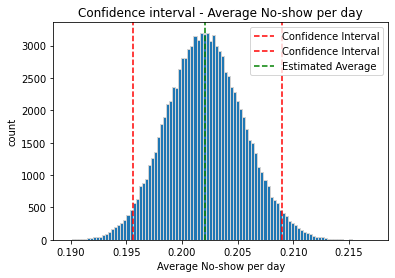

In [79]:
# Visualizing the bootstraping result
plt.hist(avg_noshow_array, edgecolor='lightgray', bins=100) #

percentile_025 = np.percentile(avg_noshow_array, 2.5)
percentile_975 = np.percentile(avg_noshow_array, 97.5)

plt.axvline(percentile_025, color='r', ls='--', label='Confidence Interval')
plt.axvline(percentile_975, color='r', ls='--', label='Confidence Interval')
plt.axvline(avg_noshow_array.mean(), color='g', ls='--', label='Estimated Average')

plt.title('Confidence interval - Average No-show per day')
plt.xlabel('Average No-show per day')
plt.ylabel('count')
plt.legend()

#plt.savefig('Estimated_AVG_noShow_per_day.jpg')

np.percentile(avg_noshow_array, 2.5), np.percentile(avg_noshow_array, 97.5), avg_noshow_array.mean()

- ***Model the scenarios and identify the relaionship between scenarios count and No-Show% per scenario***

In [80]:
from matplotlib.patches import Ellipse

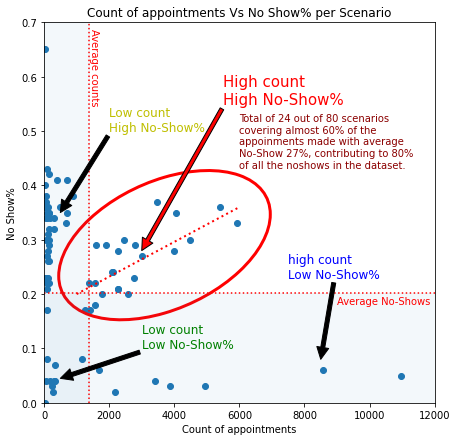

In [81]:
plt.figure(figsize= [7, 7])

plt.scatter(grouped_scen.counts, grouped_scen.AVG);

plt.title("Count of appointments Vs No Show% per Scenario")
plt.xlabel("Count of appointments")
plt.ylabel("No Show%")

plt.axhline(df.no_show.mean(), linestyle='dotted', color='r');
plt.axvline(grouped_scen.counts.mean(), linestyle='dotted', color='r');


ellips = Ellipse((3700, .29), width=6500, height = .25, fill=False, edgecolor='r',lw=3, alpha=1, angle=0.001) #angle=45) #
plt.gca().add_patch(ellips)


plt.axhspan(0,df.no_show.mean(), color='tab:blue', alpha=.05);
plt.axvspan(0,grouped_scen.counts.mean(), color='tab:blue', alpha=.05);

plt.xlim(0, 12000)
plt.ylim(0, 0.7)


x_ranges_outliers = [1000, 6000]
y_ranges_outliers = [0.2, 0.36]

plt.plot(x_ranges_outliers, y_ranges_outliers, color='r', lw=2, alpha=1, ls='dotted');


plt.annotate('high count \nLow No-Show%',xy=(8500, 0.08), 
             xytext=(7500, 0.23), fontsize=12, color='b', arrowprops = dict(facecolor='black')); 

plt.annotate('Low count \nLow No-Show%',xy=(500, 0.045), xytext=(3000, 0.1),
             fontsize=12, color='g', arrowprops = dict(facecolor='black')); 

plt.annotate('Low count \nHigh No-Show%',xy=(500, 0.35), xytext=(2000, 0.5),
             fontsize=12, color='y', arrowprops = dict(facecolor='black')); 

plt.annotate('High count \nHigh No-Show%',xy=(3000, 0.28), xytext=(5500, 0.55),
             fontsize=15, color='r', arrowprops = dict(facecolor='r')); 

note = """
Total of 24 out of 80 scenarios 
covering almost 60% of the 
appoinments made with average 
No-Show 27%, contributing to 80% 
of all the noshows in the dataset.

""";
plt.text(6000, .39, note, color='darkred');

plt.text(grouped_scen.counts.mean(), .55, "Average counts", color='r', rotation=-90);
plt.text(9000, df.no_show.mean()-0.02, "Average No-Shows", color='r');

plt.savefig('finding_scenarios.jpg')

- ***Create new variables to seperate scenarios with High count and High No-Show% from other scenarios***

In [82]:
# new variable columns "high counts of appointments and high no-show%"
grouped_scen['high_high'] = (grouped_scen['AVG'] >0.15) & (grouped_scen['counts'] >1000)
grouped_scen['count_noshow'] = round((grouped_scen['counts'] * grouped_scen['AVG']),0)
grouped_scen['count_show'] = grouped_scen['counts'] - grouped_scen['count_noshow']

In [83]:
grouped_scen.head()

,AVG,counts,counts_weight,high_high,count_noshow,count_show
scen,,,,,,
00001100,0.05,10959,0.10,False,548.0,10411.0
00000100,0.06,8554,0.08,False,513.0,8041.0
00101001,0.33,5939,0.05,True,1960.0,3979.0
00001001,0.36,5400,0.05,True,1944.0,3456.0
00011100,0.03,4958,0.04,False,149.0,4809.0


- ***Create new dataframe grouping scenarios with High count and High No-Show%***

In [84]:
# New dataframe grouped_scen2, grouping by columns "high counts of appointments and high no-show%"

grouped_scen2 = grouped_scen.groupby('high_high')['counts', 'count_noshow'].sum()
grouped_scen2['avg_noshow'] = grouped_scen2['count_noshow'] / grouped_scen2['counts']
grouped_scen2['counts_weight'] = grouped_scen2['counts'] / grouped_scen2['counts'].sum()
grouped_scen2['counts_weight'] = round(grouped_scen2['counts_weight'],2)
grouped_scen2['noshow_weight'] = grouped_scen2['count_noshow'] / grouped_scen2['count_noshow'].sum()
grouped_scen2['noshow_weight'] = round(grouped_scen2['noshow_weight'],2)
grouped_scen2 = grouped_scen2.reindex([True, False])
grouped_scen2['count_of_scenarios'] = [24, 56]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [85]:
grouped_scen2

,counts,count_noshow,avg_noshow,counts_weight,noshow_weight,count_of_scenarios
high_high,,,,,,
True,64392,17928.0,0.278420,0.58,0.8,24
False,46129,4352.0,0.094344,0.42,0.2,56


- ***Comparing scenarios with High count and High No-Show% Vs. Other Categories***

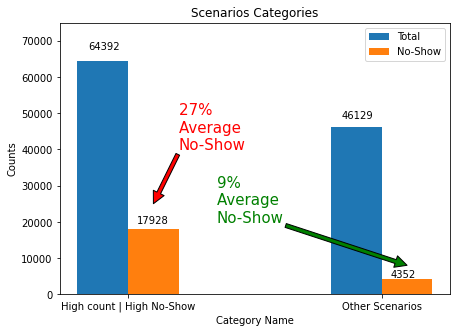

In [86]:
xrange = np.arange(len(grouped_scen2))
width = 0.2

plt.figure(figsize=[7,5]);
plt.bar(xrange, grouped_scen2.counts, width, label='Total');
plt.bar(xrange + width, grouped_scen2.count_noshow, width, label='No-Show');
plt.legend(); 
plt.xticks(xrange + (width/2), ['High count | High No-Show', 'Other Scenarios']);
plt.ylim(0, 75000);

plt.title("Scenarios Categories");
plt.ylabel('Counts');
plt.xlabel('Category Name');

plt.annotate('27% \nAverage \nNo-Show',xy=(0.2, 25000), xytext=(0.3, 40000),
             fontsize=15, color='r', arrowprops = dict(facecolor='r')); 

plt.annotate('9% \nAverage \nNo-Show',xy=(1.2, 8000), xytext=(0.45, 20000),
             fontsize=15, color='g', arrowprops = dict(facecolor='g')); 

for i in xrange:
    plt.text(xrange[i] - (width/3.5), grouped_scen2.counts.iloc[i] * 1.05, int(grouped_scen2.counts.iloc[i]))
    plt.text(xrange[i] + (width/1.5), grouped_scen2.count_noshow.iloc[i]* 1.1, int(grouped_scen2.count_noshow.iloc[i]))
#str(round(day_difference_df.AVG.iloc[i - 1],2)), fontsize = 25, color='w'

#plt.savefig('scenarios_avg_noshow_comparison.jpg')


- ***Create a final dataframe with user friendly readable information about the modeled scenarios***

In [87]:
#isolating the scenarios to put them in an easily readable format

#create new df with specific variable of interest and remove duplicates
df_new_dupl = df_new.drop(columns=['appointment_id', 'appointment_date', 'no_show']).copy()
df_new_dupl = df_new_dupl.drop_duplicates().copy()

#merge 2 dfs (the grouping of scenario and variables of the scenarios)
df_fin = df_new_dupl.merge(grouped_scen, left_on='scen', right_on=grouped_scen.index, how='left')



In [88]:
# considering also the scenarios with high counts and high noshow%
df_fin_noshow  = df_fin[df_fin['high_high'] == True].sort_values(by=['AVG', 'counts'], ascending = [False, False])

#identify variables to be transformed
vars_noshow = ['hipertension', 'sms', 'age_40_and_less', 'frequenct_2_7', 'app_10_days']
transforming_variables = df_fin_noshow[vars_noshow].copy()

In [89]:
df_fin_noshow.head()

,scholarship,hipertension,sms,age_40_and_less,frequenct_2_7,app_sameday,app_10_days,app_more_10days,scen,AVG,counts,counts_weight,high_high,count_noshow,count_show
21,0,0,0,0,0,0,0,1,00000001,0.37,3476,0.03,True,1286.0,2190.0
10,0,0,0,0,1,0,0,1,00001001,0.36,5400,0.05,True,1944.0,3456.0
31,0,0,1,0,0,0,0,1,00100001,0.35,4042,0.04,True,1415.0,2627.0
24,0,0,1,0,1,0,0,1,00101001,0.33,5939,0.05,True,1960.0,3979.0
6,0,0,0,0,1,0,1,0,00001010,0.30,4488,0.04,True,1346.0,3142.0


- ***Transform the scenario codes and readable information***

In [90]:
# iterating over the dataframe to create a list with the descriptions of each scenario
list_vars = []

for i, value in transforming_variables.iterrows():
    list = value.values
    
    
    if list[0] == 1:
        hiper = "- Have Hipertension"
    else:
        hiper = ""
#----------------------------------------------      
        
    if list[1] == 1:
        sms = "- Remidner SMS sent -"
    else:
        sms = "- Remidner SMS not sent -"
#---------------------------------------------- 
        
    if list[2] == 1:
        age = "- Age equal or less than 40 -"
    else:
        age = "- Age greater than 40 -"
#---------------------------------------------- 
        
    if list[3] == 1:
        freq = "- Frequent patient -"
    else:
        freq = ""
#---------------------------------------------- 
        
    if list[4] == 1:
        appo = "Appointment within 2 - 10 days "
    else:
        appo = "Appointment After 10 days "
#---------------------------------------------- 
           
    all_vars = str(appo) + str(age) + str(freq) + str(sms) + str(hiper)
    list_vars.append(all_vars)
    

In [91]:
#adding the newly created list of discriptions to the dataframe
df_fin_noshow['scenario_details'] = list_vars

#creating final dataframe with final needed information
df_final = df_fin_noshow[['scenario_details', 'counts','count_noshow', 'AVG', 'counts_weight']].reset_index(drop=True)

# string change for readability
df_final['scenario_details'] = df_final['scenario_details'].str.replace("--", "-")
df_final['scenario_details'] = df_final['scenario_details'].apply(lambda x: x[:-2] if x[-2:] == " -" else x[:])
df_final['scenario_details'] = df_final['scenario_details'].str.replace("--", "-")
df_final.columns = ['Scenarios Details', 'Count of Appointments', 'count of No-Shows', 'Average No-show', 'Count of Appointments weightage']

- ***Filter the final dataframe to include the data for scenarios with High count and high No-Show% only***

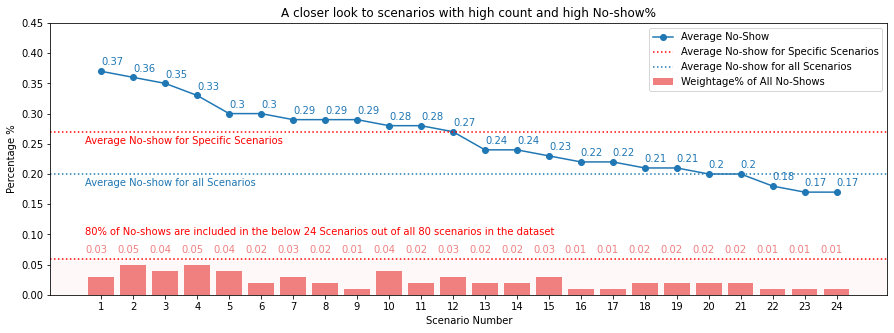

In [92]:
scenarios_ranges = np.linspace(1, len(df_final), 24)

plt.figure(figsize=[15,5])
plt.bar(scenarios_ranges, df_final['Count of Appointments weightage'], color='lightcoral', label='Weightage% of All No-Shows');
plt.axhspan(0,.06, color='lightcoral', alpha=0.05)
plt.axhline(0.06, color='r', alpha=1, ls='dotted')

plt.plot(scenarios_ranges, df_final['Average No-show'], marker='o', label='Average No-Show');
plt.axhline(0.27, ls='dotted', label='Average No-show for Specific Scenarios', color='r')
plt.axhline(0.20, ls='dotted', label='Average No-show for all Scenarios')

plt.title('A closer look to scenarios with high count and high No-show%')
plt.xlabel('Scenario Number')
plt.ylabel('Percentage %')


plt.text(0.5, 0.25, 'Average No-show for Specific Scenarios', color='r');
plt.text(0.5, 0.18, 'Average No-show for all Scenarios', color='tab:blue');

plt.text(0.5, 0.1,
         '80% of No-shows are included in the below 24 Scenarios out of all 80 scenarios in the dataset',
         color='r');
  
plt.legend();
plt.xticks(scenarios_ranges);


final_counts_array = np.array(df_final['Count of Appointments weightage'])
final_avg_array = df_final['Average No-show']

plt.ylim(0,0.45)
for i in range(len(scenarios_ranges)):
    plt.text(scenarios_ranges[i] - 0.5, 0.07, round(final_counts_array[i],2), color='lightcoral', fontsize = 10)
    plt.text(scenarios_ranges[i], final_avg_array[i]+0.01, round(final_avg_array[i],2), color='tab:blue', fontsize = 10)


#plt.savefig('linechart_scenarios.jpg')
    

- ***List all the failed scenarios details***

In [93]:
pd.set_option("display.max_colwidth", -1)
color_map = plt.cm.get_cmap('Wistia')
df_final.style.background_gradient(cmap =color_map)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,Scenarios Details,Count of Appointments,count of No-Shows,Average No-show,Count of Appointments weightage
0,Appointment After 10 days - Age greater than 40 - Remidner SMS not sent,3476,1286.000000,0.370000,0.030000
1,Appointment After 10 days - Age greater than 40 - Frequent patient - Remidner SMS not sent,5400,1944.000000,0.360000,0.050000
2,Appointment After 10 days - Age greater than 40 - Remidner SMS sent,4042,1415.000000,0.350000,0.040000
3,Appointment After 10 days - Age greater than 40 - Frequent patient - Remidner SMS sent,5939,1960.000000,0.330000,0.050000
4,Appointment within 2 - 10 days - Age greater than 40 - Frequent patient - Remidner SMS not sent,4488,1346.000000,0.300000,0.040000
5,Appointment within 2 - 10 days - Age greater than 40 - Remidner SMS not sent,2442,733.000000,0.300000,0.020000
6,Appointment After 10 days - Age equal or less than 40 - Frequent patient - Remidner SMS not sent,2803,813.000000,0.290000,0.030000
7,Appointment After 10 days - Age equal or less than 40 - Frequent patient - Remidner SMS not sent - Have Hipertension,1889,548.000000,0.290000,0.020000
8,Appointment After 10 days - Age equal or less than 40 - Frequent patient - Remidner SMS sent - Have Hipertension,1602,465.000000,0.290000,0.010000
9,Appointment within 2 - 10 days - Age greater than 40 - Frequent patient - Remidner SMS sent,3999,1120.000000,0.280000,0.040000
